In [ ]:
import wbdata
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy.stats as st

import os
from docx import Document
from docx.shared import Inches, Pt
from docx.table import Table
from openpyxl import load_workbook
from deep_translator import GoogleTranslator
from docx.enum.text import WD_ALIGN_PARAGRAPH
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
sp.init_printing(use_unicode=True,use_latex=True)
###################
def add_excel_table_to_docx(xlsx_file, docx_file, sheet_name='Sheet1',from_row=1):
    """Добавляет таблицу из указанного листа Excel в документ Word.

    Args:
        xlsx_file (str): Путь к файлу Excel.
        docx_file (str): Путь к документу Word.
        sheet_name (str, optional): Название листа в Excel. По умолчанию 'Лист1'.
    """

    # Загрузка данных из Excel
    workbook = load_workbook(xlsx_file)
    worksheet = workbook[sheet_name]

    # Создание нового документа Word или открытие существующего
    document = Document(docx_file)

    # Создание таблицы в документе Word
    table = document.add_table(rows=worksheet.max_row, cols=worksheet.max_column)

    # Заполнение ячеек таблицы данными из Excel
    for row_idx in range(from_row, worksheet.max_row + 1):
        for col_idx in range(1, worksheet.max_column + 1):
            cell = table.cell(row_idx - 1, col_idx - 1)
            cell.text = str(worksheet.cell(row=row_idx, column=col_idx).value)

    # Сохранение документа Word
    document.save(docx_file)
###################
def add_text(docx_file,text:str,font_name='Times New Roman',font_size=12,par_allign='CENTER'):
    alligments={
        'CENTER': WD_ALIGN_PARAGRAPH.CENTER,
        'LEFT':WD_ALIGN_PARAGRAPH.LEFT,
        'RIGHT':WD_ALIGN_PARAGRAPH.RIGHT,
    }
    document = Document(docx_file)
    paragraph = document.add_paragraph()
    paragraph.alignment = alligments[par_allign]  # Выравнивание по центру (можно изменить)
    run = paragraph.add_run(text)
    run.font.size=Pt(font_size)
    run.font.name=font_name
    document.save(docx_file)
###################
def add_image_to_docx(docx_file, image_path, indent_size=-2, width=10.0):
    indent_size=Inches(indent_size)
    width=Inches(width)
    """Добавляет изображение PNG в документ DOCX с заданным отступом слева.

    Args:
        docx_file (str): Путь к существующему или новому DOCX файлу.
        image_path (str): Путь к изображению PNG.
        indent_size (Inches, optional): Размер отступа слева в дюймах. По умолчанию 0.5 дюйма.
        width (Inches, optional): Ширина изображения в дюймах. По умолчанию 3 дюйма.
    """

    document = Document(docx_file)
    paragraph = document.add_paragraph()
    paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER  # Выравнивание по центру (можно изменить)
    run = paragraph.add_run()
    run.add_picture(image_path, width=width)
    paragraph.paragraph_format.first_line_indent = indent_size
    document.save(docx_file)
###################
# Пример использования:
country = 'RUS'
indicators = {
    'NY.GDP.MKTP.CD': 'GDP (current USD)',
    'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)',
    'SL.UEM.TOTL.ZS': 'Unemployment rate (%)',
}
GDP_norm = 0.025
document = Document()
translator = GoogleTranslator(source='auto', target='ru')

In [2]:
#country_dict=dict([[i.split('   ')[0],translator.translate(i.split('   ')[1])] for i in str(wbdata.get_countries()).split('\n')[2:]])
country_dict={
    'ABW': 'Аруба',
 'AFE': 'Африка Восточная и Южная',
 'AFG': 'Афганистан',
 'AFR': 'Африка',
 'AFW': 'Западная и Центральная Африка',
 'AGO': 'Ангола',
 'ALB': 'Албания',
 'AND': 'Андорра',
 'ARB': 'Арабский мир',
 'ARE': 'Объединенные Арабские Эмираты',
 'ARG': 'Аргентина',
 'ARM': 'Армения',
 'ASM': 'Американское Самоа',
 'ATG': 'Антигуа и Барбуда',
 'AUS': 'Австралия',
 'AUT': 'Австрия',
 'AZE': 'Азербайджан',
 'BDI': 'Бурунди',
 'BEA': 'Восточная Азия и Тихоокеанский регион (только страны МБРР)',
 'BEC': 'Европа и Центральная Азия (только страны МБРР)',
 'BEL': 'Бельгия',
 'BEN': 'Бенин',
 'BFA': 'Буркина-Фасо',
 'BGD': 'Бангладеш',
 'BGR': 'Болгария',
 'BHI': 'Страны МБРР классифицируются как страны с высоким уровнем дохода',
 'BHR': 'Бахрейн',
 'BHS': 'Багамские острова,',
 'BIH': 'Босния и Герцеговина',
 'BLA': 'Латинская Америка и страны Карибского бассейна (только страны МБРР)',
 'BLR': 'Беларусь',
 'BLZ': 'Белиз',
 'BMN': 'Ближний Восток и Северная Африка (только страны МБРР)',
 'BMU': 'Бермудские острова',
 'BOL': 'Боливия',
 'BRA': 'Бразилия',
 'BRB': 'Барбадос',
 'BRN': 'Бруней-Даруссалам',
 'BSS': 'Африка к югу от Сахары (только страны МБРР)',
 'BTN': 'Бутан',
 'BWA': 'Ботсвана',
 'CAA': 'Африка к югу от Сахары (классификация IFC)',
 'CAF': 'Центральноафриканская Республика',
 'CAN': 'Канада',
 'CEA': 'Восточная Азия и Тихоокеанский регион (классификация IFC)',
 'CEB': 'Центральная Европа и Прибалтика',
 'CEU': 'Европа и Центральная Азия (классификация IFC)',
 'CHE': 'Швейцария',
 'CHI': 'Нормандские острова',
 'CHL': 'Чили',
 'CHN': 'Китай',
 'CIV': "Кот-д'Ивуар",
 'CLA': 'Латинская Америка и Карибский бассейн (классификация IFC)',
 'CME': 'Ближний Восток и Северная Африка (классификация IFC)',
 'CMR': 'Камерун',
 'COD': 'Конго, Демократическая Республика.',
 'COG': 'Республика Конго',
 'COL': 'Колумбия',
 'COM': 'Коморские острова',
 'CPV': 'Кабо-Верде',
 'CRI': 'Коста-Рика',
 'CSA': 'Южная Азия (классификация IFC)',
 'CSS': 'малые государства Карибского бассейна',
 'CUB': 'Куба',
 'CUW': 'Кюрасао',
 'CYM': 'Каймановы острова',
 'CYP': 'Кипр',
 'CZE': 'Чехия',
 'DEA': 'Восточная Азия и Тихоокеанский регион (страны, имеющие право на получение помощи МАР)',
 'DEC': 'Европа и Центральная Азия (страны, имеющие право на получение помощи МАР)',
 'DEU': 'Германия',
 'DJI': 'Джибути',
 'DLA': 'Латинская Америка и страны Карибского бассейна (страны, имеющие право на получение помощи МАР)',
 'DMA': 'Доминика',
 'DMN': 'Ближний Восток и Северная Африка (страны, имеющие право на получение помощи МАР)',
 'DNK': 'Дания',
 'DNS': 'Страны МАР в Африке к югу от Сахары не классифицируются как нестабильные',
 'DOM': 'Доминиканская Республика',
 'DSA': 'Южная Азия (страны, имеющие право на получение помощи МАР)',
 'DSF': 'Страны МАР в Африке к югу от Сахары классифицируются как нестабильные',
 'DSS': 'Страны Африки к югу от Сахары (страны, имеющие право на получение помощи МАР)',
 'DZA': 'Алжир',
 'EAP': 'Восточная Азия и Тихоокеанский регион (за исключением стран с высоким уровнем дохода)',
 'EAR': 'Ранние демографические дивиденды',
 'EAS': 'Восточная Азия и Тихоокеанский регион',
 'ECA': 'Европа и Центральная Азия (за исключением стран с высоким уровнем дохода)',
 'ECS': 'Европа и Центральная Азия',
 'ECU': 'Эквадор',
 'EGY': 'Египет, Арабская Республика',
 'EMU': 'Еврозона',
 'ERI': 'Эритрея',
 'ESP': 'Испания',
 'EST': 'Эстония',
 'ETH': 'Эфиопия',
 'EUU': 'Евросоюз',
 'FCS': 'Нестабильные и конфликтные ситуации',
 'FIN': 'Финляндия',
 'FJI': 'Фиджи',
 'FRA': 'Франция',
 'FRO': 'Фарерские острова',
 'FSM': 'Микронезия, Федерал. Ст.',
 'FXS': 'Страны МАР, классифицированные как нестабильные, за исключением стран Африки к югу от Сахары',
 'GAB': 'Габон',
 'GBR': 'Великобритания',
 'GEO': 'Грузия',
 'GHA': 'Гана',
 'GIB': 'Гибралтар',
 'GIN': 'Гвинея',
 'GMB': 'Гамбия,',
 'GNB': 'Гвинея-Бисау',
 'GNQ': 'Экваториальная Гвинея',
 'GRC': 'Греция',
 'GRD': 'Гренада',
 'GRL': 'Гренландия',
 'GTM': 'Гватемала',
 'GUM': 'Гуам',
 'GUY': 'Гайана',
 'HIC': 'Высокий доход',
 'HKG': 'Гонконг, САР, Китай',
 'HND': 'Гондурас',
 'HPC': 'Бедные страны с высокой задолженностью (HIPC)',
 'HRV': 'Хорватия',
 'HTI': 'Гаити',
 'HUN': 'Венгрия',
 'IBB': 'МБРР, включая смешанный',
 'IBD': 'только МБРР',
 'IBT': 'Итого МАР и МБРР',
 'IDA': 'общий ADI',
 'IDB': 'смесь ИДА',
 'IDN': 'Индонезия',
 'IDX': 'только МАР',
 'IMN': 'Остров Мэн',
 'IND': 'Индия',
 'INX': 'Не классифицировано',
 'IRL': 'Ирландия',
 'IRN': 'Иран, Исламская Республика',
 'IRQ': 'Ирак',
 'ISL': 'Исландия',
 'ISR': 'Израиль',
 'ITA': 'Италия',
 'JAM': 'Ямайка',
 'JOR': 'Иордания',
 'JPN': 'Япония',
 'KAZ': 'Казахстан',
 'KEN': 'Кения',
 'KGZ': 'Кыргызская Республика',
 'KHM': 'Камбоджа',
 'KIR': 'Кирибати',
 'KNA': 'Сент-Китс и Невис',
 'KOR': 'Республика Корея.',
 'KWT': 'Кувейт',
 'LAC': 'Латинская Америка и Карибский бассейн (за исключением стран с высоким уровнем дохода)',
 'LAO': 'Лаосская НДР',
 'LBN': 'Ливан',
 'LBR': 'Либерия',
 'LBY': 'Ливия',
 'LCA': 'Сент-Люсия',
 'LCN': 'Латинская Америка и Карибский бассейн',
 'LDC': 'Наименее развитые страны: классификация ООН',
 'LIC': 'Низкий доход',
 'LIE': 'Лихтенштейн',
 'LKA': 'Шри-Ланка',
 'LMC': 'Уровень дохода ниже среднего',
 'LMY': 'Низкий и средний доход',
 'LSO': 'Лесото',
 'LTE': 'Поздний демографический дивиденд',
 'LTU': 'Литва',
 'LUX': 'Люксембург',
 'LVA': 'Латвия',
 'MAC': 'Макао, САР, Китай',
 'MAF': 'Сен-Мартен (французская часть)',
 'MAR': 'Марокко',
 'MCO': 'Монако',
 'MDA': 'Молдова',
 'MDE': 'Ближний Восток (только развивающиеся)',
 'MDG': 'Мадагаскар',
 'MDV': 'Мальдивы',
 'MEA': 'Ближний Восток и Северная Африка',
 'MEX': 'Мексика',
 'MHL': 'Маршалловы острова',
 'MIC': 'Средний доход',
 'MKD': 'Северная Македония',
 'MLI': 'Мали',
 'MLT': 'Мальта',
 'MMR': 'Мьянма',
 'MNA': 'Ближний Восток и Северная Африка (за исключением стран с высоким уровнем дохода)',
 'MNE': 'Черногория',
 'MNG': 'Монголия',
 'MNP': 'Северные Марианские острова',
 'MOZ': 'Мозамбик',
 'MRT': 'Мавритания',
 'MUS': 'Маврикий',
 'MWI': 'Малави',
 'MYS': 'Малайзия',
 'NAC': 'Северная Америка',
 'NAF': 'Северная Африка',
 'NAM': 'Намибия',
 'NCL': 'Новая Каледония',
 'NER': 'Нигер',
 'NGA': 'Нигерия',
 'NIC': 'Никарагуа',
 'NLD': 'Нидерланды',
 'NOR': 'Норвегия',
 'NPL': 'Непал',
 'NRS': 'Страны Африки к югу от Сахары, не богатые ресурсами',
 'NRU': 'Науру',
 'NXS': 'Страны МАР, не классифицированные как страны с нестабильной ситуацией, за исключением стран Африки к югу от Сахары',
 'NZL': 'Новая Зеландия',
 'OED': 'Члены ОЭСР',
 'OMN': 'Оман',
 'OSS': 'Другие малые государства',
 'PAK': 'Пакистан',
 'PAN': 'Панама',
 'PER': 'Перу',
 'PHL': 'Филиппины',
 'PLW': 'Палау',
 'PNG': 'Папуа-Новая Гвинея',
 'POL': 'Польша',
 'PRE': 'Преддемографический дивиденд',
 'PRI': 'Пуэрто-Рико',
 'PRK': 'Корея, Народно-Демократическая Республика',
 'PRT': 'Португалия',
 'PRY': 'Парагвай',
 'PSE': 'Западный берег и сектор Газа',
 'PSS': 'малые островные государства Тихого океана',
 'PST': 'Постдемографический дивиденд',
 'PYF': 'Французская Полинезия',
 'QAT': 'Катар',
 'ROU': 'Румыния',
 'RRS': 'Богатые ресурсами страны Африки к югу от Сахары',
 'RUS': 'Российская Федерация',
 'RWA': 'Руанда',
 'SAS': 'Южная Азия',
 'SAU': 'Саудовская Аравия',
 'SDN': 'Судан',
 'SEN': 'Сенегал',
 'SGP': 'Сингапур',
 'SLB': 'Соломоновы острова',
 'SLE': 'Сьерра-Леоне',
 'SLV': 'Сальвадор',
 'SMR': 'Сан-Марино',
 'SOM': 'Сомали',
 'SRB': 'Сербия',
 'SSA': 'Африка к югу от Сахары (за исключением стран с высоким уровнем дохода)',
 'SSD': 'Южный Судан',
 'SSF': 'Африка к югу от Сахары',
 'SST': 'Малые государства',
 'STP': 'Сан-Томе и Принсипи',
 'SUR': 'Суринам',
 'SVK': 'Словацкая Республика',
 'SVN': 'Словения',
 'SWE': 'Швеция',
 'SWZ': 'В Свате',
 'SXM': 'Синт-Мартен (голландская часть)',
 'SXZ': 'Африка к югу от Сахары, за исключением Южной Африки',
 'SYC': 'Сейшельские острова',
 'SYR': 'Сирийская Арабская Республика',
 'TCA': 'Острова Теркс и Кайкос',
 'TCD': 'Чад',
 'TEA': 'Восточная Азия и Тихоокеанский регион (страны МАР и МБРР)',
 'TEC': 'Европа и Центральная Азия (страны МАР и МБРР)',
 'TGO': 'Того',
 'THA': 'Таиланд',
 'TJK': 'Таджикистан',
 'TKM': 'Туркменистан',
 'TLA': 'Латинская Америка и страны Карибского бассейна (страны МАР и МБРР)',
 'TLS': 'Тимор-Лешти',
 'TMN': 'Ближний Восток и Северная Африка (страны МАР и МБРР)',
 'TON': 'Тонга',
 'TSA': 'Южная Азия (МАР и МБРР)',
 'TSS': 'Африка к югу от Сахары (страны МАР и МБРР)',
 'TTO': 'Тринидад и Тобаго',
 'TUN': 'Тунис',
 'TUR': 'Турция',
 'TUV': 'Тувалу',
 'TZA': 'Танзания',
 'UGA': 'Уганда',
 'UKR': 'Украина',
 'UMC': 'Доход выше среднего',
 'URY': 'Уругвай',
 'USA': 'Соединенные Штаты',
 'UZB': 'Узбекистан',
 'VCT': 'Сент-Винсент и Гренадины',
 'VEN': 'Венесуэла, РБ',
 'VGB': 'Британские Виргинские острова',
 'VIR': 'Виргинские острова (США)',
 'VNM': 'Вьетнам',
 'VUT': 'Вануату',
 'WLD': 'Мир',
 'WSM': 'Самоа',
 'XKX': 'Косово',
 'XZN': 'Африка к югу от Сахары, за исключением Южной Африки и Нигерии',
 'YEM': 'Йемен, Республика',
 'ZAF': 'ЮАР',
 'ZMB': 'Замбия',
 'ZWE': 'Зимбабве'}

In [3]:
data = wbdata.get_dataframe(indicators, country=country)
data = data.dropna().sort_values('date')
data['GDP (current USD)'] = data['GDP (current USD)']
data.rename(columns={'GDP (current USD)': 'GDP'}, inplace=True)
try:
    os.mkdir(f'{country}')
    os.chdir(f'{country}')
except:
    os.chdir(f'{country}')
try:
    data.to_excel(f'{country}_1.xlsx')
except:
    pass
display(data)
document.save(f'{country}.docx')
add_text(f'{country}.docx',f'Коэффициент Оукена для страны {country_dict[country]}',font_size=15)
add_text(f'{country}.docx',f'\tПолучим данные о фактическом ВВП в долларовом эквиваленте(GDP), ежегодном росте этого ВВП в процентах(GDP growth (annual %)) и динамике безработицы(Unemployment rate (%)) из статистики Мирового Банка о стране {country_dict[country]}.',par_allign='LEFT')
add_excel_table_to_docx(f'{country}_1.xlsx',f'{country}.docx')

,GDP,GDP growth (annual %),Unemployment rate (%)
date,,,
1991,5.179630e+11,-5.046939,5.133
1992,4.602906e+11,-14.531074,5.181
1993,4.350837e+11,-8.668540,5.883
1994,3.950773e+11,-12.569756,8.131
1995,3.955372e+11,-4.143528,9.449
1996,3.917249e+11,-3.755069,9.665
1997,4.049290e+11,1.399916,11.813
1998,2.709555e+11,-5.299962,13.261
1999,1.959071e+11,6.399915,13.036


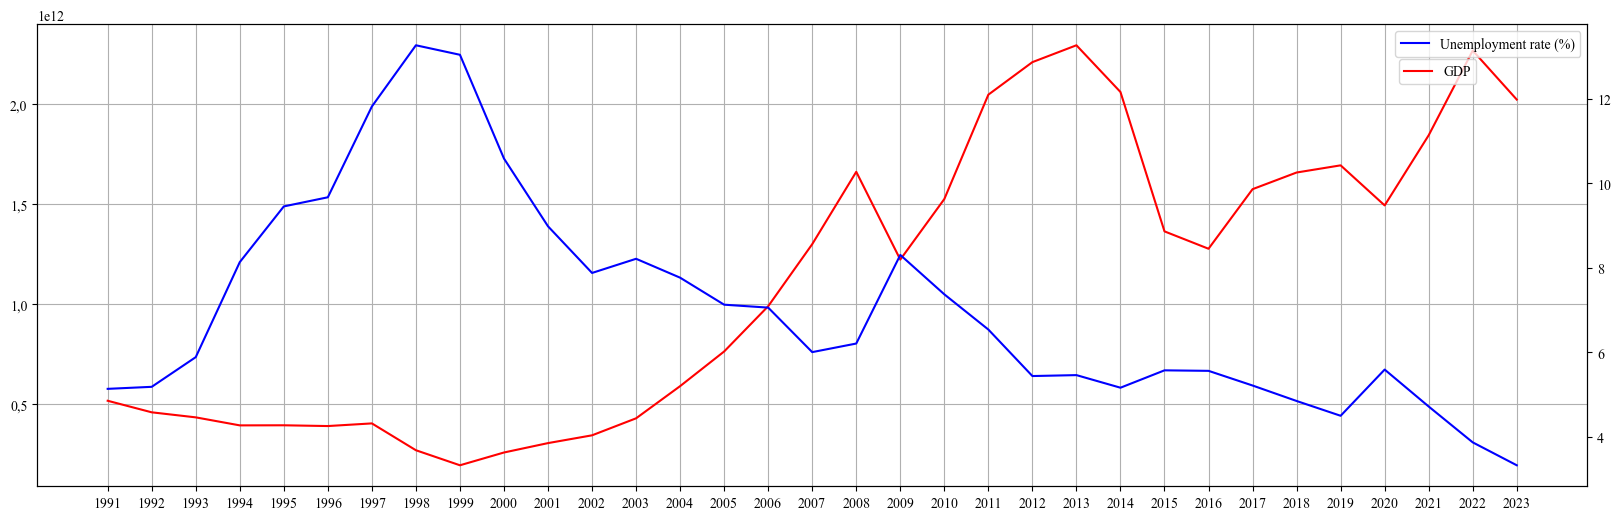

In [4]:
fig, ax = plt.subplots(figsize=(20, 6))

gdp, = ax.plot(data['GDP'], 'r', label='GDP')

ax1 = ax.twinx()
unemplt, = ax1.plot(data['Unemployment rate (%)'], 'b', label='Unemployment rate (%)')

ax.legend(loc='upper right', bbox_to_anchor=(0.933, 0.94))
ax1.legend()

ax.grid(True)

try:
    plt.savefig(f'{country}_2.png')
except:
    pass
add_text(f'{country}.docx','\n\nПроведем анализ изменения ВВП и безработицы в стране')
add_image_to_docx(f'{country}.docx',f'{country}_2.png')
maxgdp_year=int(*data[data['GDP']==max(data['GDP'])].index)
maxunemp_year=int(*data[data['Unemployment rate (%)']==max(data['Unemployment rate (%)'])].index)
mingdp_year=int(*data[data['GDP']==min(data['GDP'])].index)
minunemp_year=int(*data[data['Unemployment rate (%)']==min(data['Unemployment rate (%)'])].index)
add_text(f'{country}.docx',f'\tКак видно из графиков, за рассматриваемый период ВВП достиг максимального значения в {maxgdp_year} году, а безработица в {maxunemp_year} году, а минимумы в {mingdp_year} и {minunemp_year} годах соответственно для ВВП и безработицы.',par_allign='LEFT')
plt.show()

In [5]:
X = data['GDP'].values
Y = data['Unemployment rate (%)'].values
n = X.shape[0]

In [6]:
sumX, sumY = sum(X), sum(Y)
meanX, meanY = X.mean(), Y.mean()

sumX2, sumY2 = sum(X**2), sum(Y**2)
meanX2, meanY2 = (X**2).mean(), (Y**2).mean()

sumDX, sumDY = sum((X-meanX)**2), sum((Y-meanY)**2)
meanDX, meanDY = ((X-meanX)**2).mean(), ((Y-meanY)**2).mean()

sumXY = sum(X*Y)
meanXY = (X*Y).mean()

b0, b1 = sp.symbols('b1 b2', real=True)

b0, b1 = sp.solve((-sumY + n*b0 + b1*sumX, -sumXY + b0*sumX + b1*sumX2), (b0, b1)).values()

b0, b1 

In [7]:
text = 'Стоит предположить, что данные показатели имеют обратную пропорциональную зависимость, ведь когда одна кривая идет вниз, другая устремлена вверх.' if str(b1/abs(b1))[0]=='-' else 'Стоит предположить, что данные показатели имеют прямую пропорциональную зависимость, ведь когда одна кривая идет вверх или вниз, другая устремлена в том же направлении.'
add_text(f'{country}.docx', '\t'+text,par_allign='LEFT')

In [8]:
rXY = (meanXY - meanX*meanY) / np.sqrt((meanX2-meanX**2)*(meanY2-meanY**2))
dXY = rXY**2
rXY, dXY

In [9]:
text = f'Проведем ывсе нужные рассчеты для коэффициентов b0, b1, и проверим значимость этих коэффициентов.'
add_text(f'{country}.docx', '\t'+text,par_allign='LEFT')

In [10]:
S = np.sqrt(sumDY/(n-2))

Sb0 = S * np.sqrt(sumX2 / (n * sumDX))
Sb1 = S * np.sqrt(1 / sumDX)

tb0 = b0/Sb0
tb1 = b1/Sb1


t_table = abs(st.t.ppf(1 - (1-0.95)/2, n-2))

text1=f'b0 {"Статистически значима" if abs(tb0)>t_table else "Статистически НЕ значима"} и равна {b0}'
text2=f'b1 {"Статистически значима" if abs(tb1)>t_table else "Статистически НЕ значима"} и равна {b1}'
add_text(f'{country}.docx', '\t'+text1,par_allign='LEFT')
add_text(f'{country}.docx', '\t'+text2,par_allign='LEFT')

In [11]:
Fr = rXY**2 / (1-rXY**2) * (n-2)
F_table = st.f.ppf(0.95, 1, n-2)
display(Fr)
h0 = f"{Fr}>{F_table}" +"\n\n\tH0 опровергнута, значит уравнение регрессии качественное" if Fr>F_table else f"{Fr}>{F_table}"+"\n\tH0 is valid => Уравнение регрессии НЕкачественное"
text = 'Посчитаем рассчетное значение коэффициента Фишера: \n\n\t '+f'F_расч = {Fr}' '\n\t F_табл = 'f'{F_table}' + '\n\n\t' + h0
add_text(f'{country}.docx', '\t'+text,par_allign='LEFT')

In [12]:
st.f.ppf(0.95, 1, n-2)

In [13]:
# ошибка прогноза
dY = S*t_table*np.sqrt( 1 + 1/n + (1.1*meanX-meanX)**2/sumDX )
dY

In [14]:
equation = f'y = {b0} - {str(b1)[1:]}x'
equation

'y = 9.87633181714691 - 2.54065643359145e-12x'

In [15]:
df1 = pd.DataFrame({'Линейное уравнение парной регрессии': (b0, b1, rXY, dXY, equation)}, index=('Параметр b0', 'Параметр b1', 'Коэффициент корреляции (r)', 'Коэффициент детерминации (r^2)', 'Полученное уравнение'))
df2 = pd.DataFrame({'Проверка Стьюдента': (0.95, n-2, t_table, tb0, tb1)}, index=('Уровень значимости', 'Число степеней свободы', 'Критическое значение Стьюдента', 't-критерий (b0)', 't-критерий (b1)'))
df3 = pd.DataFrame({'Проверка Фишера': (0.95, n-2, F_table, Fr)}, index=('Уровень значимости', 'Число степеней свободы', 'Критическое значение Фишера', 'Полученное значение Фишера'))
display(df1)
display(df2)
display(df3)
try:
    text='\n\tРассчитаемм с помощью эконометрических методов все нужные показатели и переведем все полученные данные в табличную структуру'
    add_text(f'{country}.docx',text,par_allign="LEFT")
    add_text(f'{country}.docx','\nЛинейное уравнение парной регрессии')
    df1.to_excel(f'{country}_3.xlsx')
    add_excel_table_to_docx(f'{country}_3.xlsx',f'{country}.docx',from_row=2)
    add_text(f'{country}.docx','\nПроверка Стьюдента')
    df2.to_excel(f'{country}_4.xlsx')
    add_excel_table_to_docx(f'{country}_4.xlsx',f'{country}.docx',from_row=2)
    add_text(f'{country}.docx','\nПроверка Фишера')
    df3.to_excel(f'{country}_5.xlsx')
    add_excel_table_to_docx(f'{country}_5.xlsx',f'{country}.docx',from_row=2)
except:
    pass



,Линейное уравнение парной регрессии
Параметр b0,9.87633181714691
Параметр b1,-2.54065643359145e-12
Коэффициент корреляции (r),-0.723473
Коэффициент детерминации (r^2),0.523413
Полученное уравнение,y = 9.87633181714691 - 2.54065643359145e-12x


,Проверка Стьюдента
Уровень значимости,0.95
Число степеней свободы,31
Критическое значение Стьюдента,2.039513
t-критерий (b0),11.9096508242394
t-критерий (b1),-4.02812489095455


,Проверка Фишера
Уровень значимости,0.950000
Число степеней свободы,31.000000
Критическое значение Фишера,4.159615
Полученное значение Фишера,34.045780


In [16]:
text=f'''
    \tПостроенное уравнение парной регрессии является статистически значимым, о чем свидетельствует показатель средней ошибки аппроксимации {dY}.
    \n\tПревышение значения Фишера над критическим говорит о том, что с 95 % вероятностью взаимосвязь между факторами не случайна и надежна.
    \n\tПроверка Стьюдента определила, что среди параметров уравнения, «b0» является статистически значимым, модуль t-критерия параметра «b1» тоже выше критического значения, поэтому он является статистически значимым.  
    \n\t{'Отрицательная' if str(rXY/abs(rXY))[0]=='-' else 'Положительная'} величина коэффициента корреляции {rXY} подтверждает тесную зависимость между факторами.  
    \n\tНа рисунке отражена регрессионная зависимость между ВВП и безработицей, которые отмечены на осях по возрастанию, а также прямая уравнения регрессии: 
    \n\tФормула регрессии:
    \n\t{equation}
'''
add_text(f'{country}.docx',text,par_allign='LEFT')

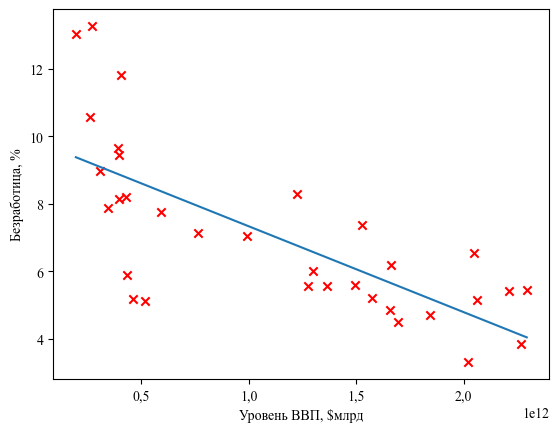

In [17]:
plt.scatter(X, Y, color='r', marker='x')
plt.plot(np.linspace(min(X),max(X),10000),b0-abs(b1)*np.linspace(min(X),max(X),10000))

plt.xlabel('Уровень ВВП, $млрд')
plt.ylabel('Безработица, %')
try:
    plt.savefig(f'{country}_6.png')
except:
    pass
add_image_to_docx(f'{country}.docx',f'{country}_6.png',0,6)

plt.show()

In [18]:
text=f'''
    \n\tДанный рисунок графически подтверждает {'обратную' if str(rXY/abs(rXY))[0]=='-' else 'прямую'} обратную зависимость между исследуемыми факторами.
    \n\n\tА. Оукен определил следующую зависимость:
    \n\tUt - Ut-1= -k (TВВП - ВВПнормальный) (1)  
    \n\t• Ut – уровень безработицы в отчетный год анализируемого периода (англ. Unemployment – безработица);
    \n\t• Ut-1 – уровень безработицы в базовый год анализируемого периода;
    \n\t• TВВП – темп роста ВВП за исследуемый период;
    \n\t• ВВП нормальный – темп роста ВВП, при котором уровень безработицы остается неизменным;
    \n\n\tПерейдем к математической оценке закона Оукена. Расчет коэффициента Оукена будет осуществляться по формуле:
    \n\n\tk = (-1) * (Ut - Ut-1) / (TВВП - ВВПнормальный)
    \n\n\tСоставим вспомогательную таблицу для расчета коэффициента Оукена для каждого года. Рассчитаем темп прироста ВВП, как отношение показателя текущего года к предыдущему в процентном выражении, то же для абсолютного отклонения безработицы. Показатель нормального ВВП примем равным 2,5 %  
'''
add_text(f'{country}.docx',text,par_allign='LEFT')

In [19]:
def OKUN(Ut, Ut_1, T):
    return (-1)*(Ut - Ut_1) / (T - 100*GDP_norm)

In [20]:
data_p = data.copy()
data_p['ВВП нормальный, %'] = GDP_norm*100

O = []
base_year = data_p.iloc[0,:]['Unemployment rate (%)']
for i in range(0,X.shape[0]):
  j = data_p.iloc[i,:]
  O.append(OKUN( j['Unemployment rate (%)'], base_year, j['GDP growth (annual %)']))
  base_year = j['Unemployment rate (%)']
data_p['Oyken'] = O
data_p.to_excel(f'{country}_7.xlsx')
add_excel_table_to_docx(f'{country}_7.xlsx',f'{country}.docx')
data_p

,GDP,GDP growth (annual %),Unemployment rate (%),"ВВП нормальный, %",Oyken
date,,,,,
1991,5.179630e+11,-5.046939,5.133,2.5,0.000000
1992,4.602906e+11,-14.531074,5.181,2.5,0.002818
1993,4.350837e+11,-8.668540,5.883,2.5,0.062855
1994,3.950773e+11,-12.569756,8.131,2.5,0.149173
1995,3.955372e+11,-4.143528,9.449,2.5,0.198389
1996,3.917249e+11,-3.755069,9.665,2.5,0.034532
1997,4.049290e+11,1.399916,11.813,2.5,1.952578
1998,2.709555e+11,-5.299962,13.261,2.5,0.185642
1999,1.959071e+11,6.399915,13.036,2.5,0.057694


In [21]:
k = data_p['Oyken'].mean()
print(f'Среднее значение за период: {k}')

Среднее значение за период: 0.19724161785452324


In [22]:
text=f'''
    \n\n\tТеперь построрим график зависимости коэффициента Оукена (синия линия) от времени. Так же нанесем на график средний за 1991-2023 коеффицент Оукена (равный {k}, красная линия), и линию нулевого коэффициенита оукена(почти прозрачная линия голубого цвета)
'''
add_text(f'{country}.docx',text,par_allign='LEFT')

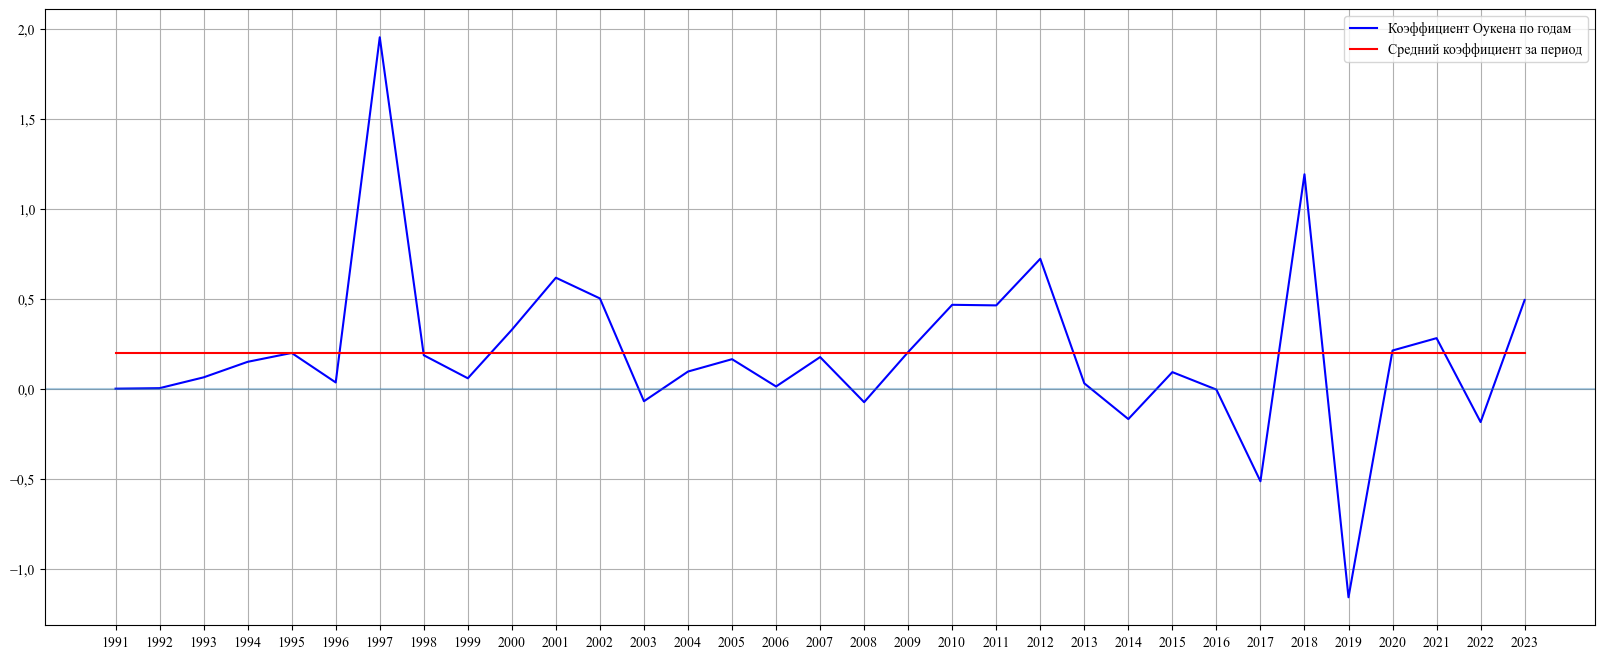

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(data_p['Oyken'], color='b', label='Коэффициент Оукена по годам')
ax.plot([k]*n, color='r',label='Средний коэффициент за период')
loc = matplotlib.ticker.MultipleLocator(base=1)
plt.axhline(alpha=0.35)
ax.grid(True)
ax.legend()

try:
    plt.savefig(f'{country}_8.png')
except:
    pass

add_image_to_docx(f'{country}.docx',f'{country}_8.png')

plt.show()

In [24]:
text=f'\n\tСредний коэффициент Оукена, равный {k}, показывает, что в среднем ежегодно безработица изменялась на {k}% за счет влияния роста ВВП и прочих факторов.\n\n\tТаким образом, можно констатировать, что теоретические основы закона Оукена находят свое отражение в реальных экономических процессах страны {country_dict[country]}.   '
add_text(f'{country}.docx',text,par_allign="LEFT")